# Correlazioni e Scatter Plot

- Correlazioni degli attributi numerici

- Scatter Plot degli attributi numerici

Importiamo Librerie e DataSet

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

df = pd.read_csv("Training_MissingValues.csv")

# Correlezione degli Attributi Numerici

** - Correlazione di Pearson **

In [2]:
df[df.columns.difference(['RefId', 'IsBadBuy', 'IsOnlineSale', 'WheelTypeID',\
                         'BYRNO', 'VNZIP1', 'VehYear'])].corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,VehOdo,VehicleAge,WarrantyCost
MMRAcquisitionAuctionAveragePrice,1.000000,0.989809,0.904546,0.904017,0.957081,0.951029,0.890480,0.889119,0.828761,-0.029714,-0.599347,-0.062992
MMRAcquisitionAuctionCleanPrice,0.989809,1.000000,0.895377,0.911503,0.944835,0.953467,0.881047,0.891549,0.826508,0.015570,-0.554130,-0.031523
MMRAcquisitionRetailAveragePrice,0.904546,0.895377,1.000000,0.989619,0.868332,0.864969,0.936613,0.928688,0.788474,0.019460,-0.494518,-0.064902
MMRAcquisitonRetailCleanPrice,0.904017,0.911503,0.989619,1.000000,0.865504,0.873859,0.928815,0.932162,0.793813,0.055023,-0.460930,-0.037127
MMRCurrentAuctionAveragePrice,0.957081,0.944835,0.868332,0.865504,1.000000,0.990021,0.912116,0.909169,0.802113,-0.043128,-0.601396,-0.067549
MMRCurrentAuctionCleanPrice,0.951029,0.953467,0.864969,0.873859,0.990021,1.000000,0.904652,0.917973,0.801950,0.000483,-0.559437,-0.037427
MMRCurrentRetailAveragePrice,0.890480,0.881047,0.936613,0.928815,0.912116,0.904652,1.000000,0.989375,0.783463,0.001819,-0.532194,-0.067847
MMRCurrentRetailCleanPrice,0.889119,0.891549,0.928688,0.932162,0.909169,0.917973,0.989375,1.000000,0.787237,0.036653,-0.498326,-0.040899
VehBCost,0.828761,0.826508,0.788474,0.793813,0.802113,0.801950,0.783463,0.787237,1.000000,-0.068337,-0.325033,-0.041367
VehOdo,-0.029714,0.015570,0.019460,0.055023,-0.043128,0.000483,0.001819,0.036653,-0.068337,1.000000,0.332777,0.408248


Gli attributi 'VehOdo', 'VehicleAge', 'WarrantyCost' non hanno correlazioni significative con gli altri attributi, quindi li elimino dalla matrice per semplificare i calcoli. 

In [3]:
df[df.columns.difference(['RefId', 'IsBadBuy', 'IsOnlineSale', 'WheelTypeID',\
                         'BYRNO', 'VNZIP1', 'VehYear', 'WarrantyCost', 'VehicleAge', 'VehOdo'])].corr()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
MMRAcquisitionAuctionAveragePrice,1.000000,0.989809,0.904546,0.904017,0.957081,0.951029,0.890480,0.889119,0.828761
MMRAcquisitionAuctionCleanPrice,0.989809,1.000000,0.895377,0.911503,0.944835,0.953467,0.881047,0.891549,0.826508
MMRAcquisitionRetailAveragePrice,0.904546,0.895377,1.000000,0.989619,0.868332,0.864969,0.936613,0.928688,0.788474
MMRAcquisitonRetailCleanPrice,0.904017,0.911503,0.989619,1.000000,0.865504,0.873859,0.928815,0.932162,0.793813
MMRCurrentAuctionAveragePrice,0.957081,0.944835,0.868332,0.865504,1.000000,0.990021,0.912116,0.909169,0.802113
MMRCurrentAuctionCleanPrice,0.951029,0.953467,0.864969,0.873859,0.990021,1.000000,0.904652,0.917973,0.801950
MMRCurrentRetailAveragePrice,0.890480,0.881047,0.936613,0.928815,0.912116,0.904652,1.000000,0.989375,0.783463
MMRCurrentRetailCleanPrice,0.889119,0.891549,0.928688,0.932162,0.909169,0.917973,0.989375,1.000000,0.787237
VehBCost,0.828761,0.826508,0.788474,0.793813,0.802113,0.801950,0.783463,0.787237,1.000000


** - Correlazione di Spearman **

In [4]:
df[df.columns.difference(['RefId', 'IsBadBuy', 'IsOnlineSale', 'WheelTypeID',\
                         'BYRNO', 'VNZIP1', 'VehYear', 'WarrantyCost', 'VehicleAge', 'VehOdo'])].corr('spearman')

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
MMRAcquisitionAuctionAveragePrice,1.000000,0.990475,0.894417,0.892213,0.957613,0.951927,0.884434,0.881962,0.845896
MMRAcquisitionAuctionCleanPrice,0.990475,1.000000,0.886494,0.899525,0.945587,0.952974,0.875679,0.883895,0.850652
MMRAcquisitionRetailAveragePrice,0.894417,0.886494,1.000000,0.989502,0.857630,0.855568,0.931779,0.924265,0.793770
MMRAcquisitonRetailCleanPrice,0.892213,0.899525,0.989502,1.000000,0.853260,0.861627,0.923056,0.926489,0.801505
MMRCurrentAuctionAveragePrice,0.957613,0.945587,0.857630,0.853260,1.000000,0.990728,0.904032,0.900009,0.818660
MMRCurrentAuctionCleanPrice,0.951927,0.952974,0.855568,0.861627,0.990728,1.000000,0.897728,0.908659,0.824342
MMRCurrentRetailAveragePrice,0.884434,0.875679,0.931779,0.923056,0.904032,0.897728,1.000000,0.989113,0.790702
MMRCurrentRetailCleanPrice,0.881962,0.883895,0.924265,0.926489,0.900009,0.908659,0.989113,1.000000,0.796774
VehBCost,0.845896,0.850652,0.793770,0.801505,0.818660,0.824342,0.790702,0.796774,1.000000


** - Correlazione di Kendall **

In [5]:
df[df.columns.difference(['RefId', 'IsBadBuy', 'IsOnlineSale', 'WheelTypeID',\
                         'BYRNO', 'VNZIP1', 'VehYear', 'WarrantyCost', 'VehicleAge', 'VehOdo'])].corr('kendall')

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
MMRAcquisitionAuctionAveragePrice,1.000000,0.918926,0.735630,0.717855,0.841425,0.826679,0.707591,0.703101,0.650901
MMRAcquisitionAuctionCleanPrice,0.918926,1.000000,0.712481,0.742614,0.813407,0.833064,0.694015,0.707206,0.657138
MMRAcquisitionRetailAveragePrice,0.735630,0.712481,1.000000,0.915597,0.673050,0.669732,0.798076,0.780569,0.595039
MMRAcquisitonRetailCleanPrice,0.717855,0.742614,0.915597,1.000000,0.666433,0.679116,0.778067,0.788332,0.603179
MMRCurrentAuctionAveragePrice,0.841425,0.813407,0.673050,0.666433,1.000000,0.919909,0.747196,0.728614,0.621854
MMRCurrentAuctionCleanPrice,0.826679,0.833064,0.669732,0.679116,0.919909,1.000000,0.730204,0.752743,0.628911
MMRCurrentRetailAveragePrice,0.707591,0.694015,0.798076,0.778067,0.747196,0.730204,1.000000,0.913717,0.592810
MMRCurrentRetailCleanPrice,0.703101,0.707206,0.780569,0.788332,0.728614,0.752743,0.913717,1.000000,0.599923
VehBCost,0.650901,0.657138,0.595039,0.603179,0.621854,0.628911,0.592810,0.599923,1.000000


# Scatter Plot

Scatter Plot di tutte le coppie di attributi (Scatter Matrix)

Da questo grafico possiamo scegliere quali combinazioni di attributi sono più interessanti da analizzare graficamente

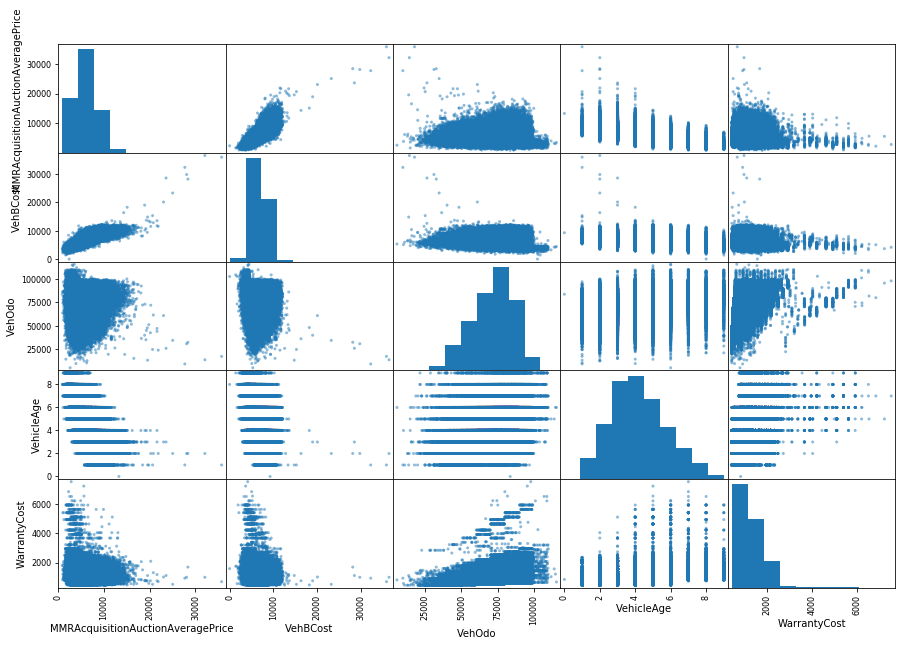

In [6]:
pd.plotting.scatter_matrix(df[['MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'VehOdo', 'VehicleAge', 'WarrantyCost']], 
                           figsize=(15, 10))
plt.show()

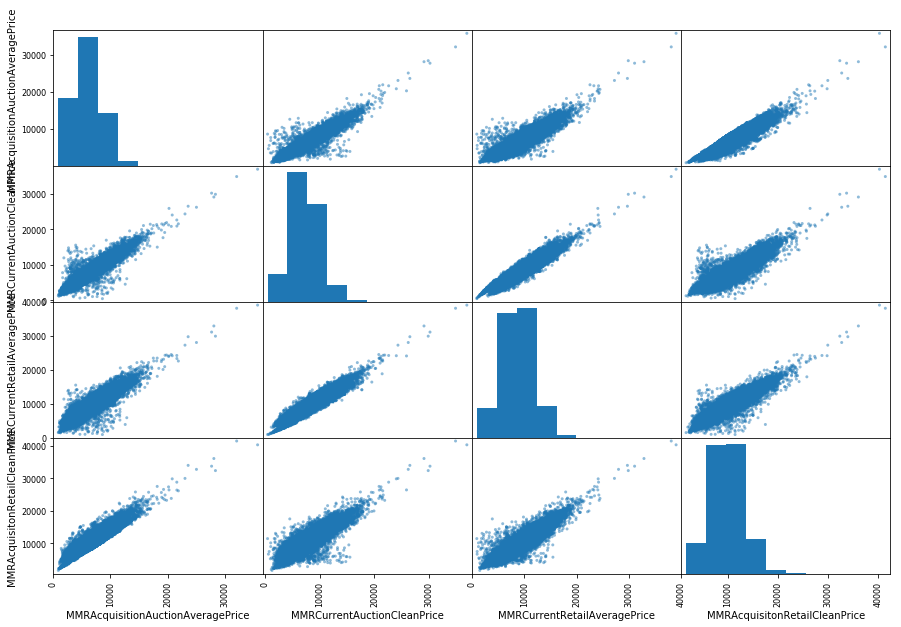

In [7]:
pd.plotting.scatter_matrix(df[['MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                               'MMRCurrentRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice']], figsize=(15, 10))
plt.show()

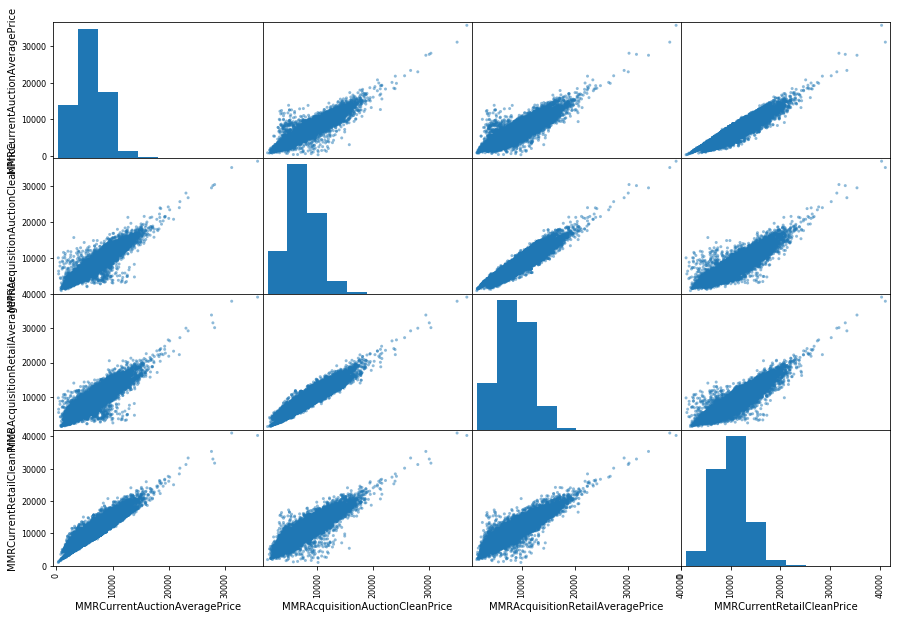

In [8]:
pd.plotting.scatter_matrix(df[['MMRCurrentAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                               'MMRAcquisitionRetailAveragePrice', 'MMRCurrentRetailCleanPrice']], figsize=(15, 10))
plt.show()

*** - MMRAcquisitionAuctionAveragePrice vs MMRAcquisitionAuctionCleanPrice ***

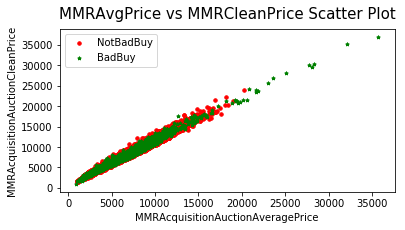

In [9]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionCleanPrice'], color='r', label='NotBadBuy', s=12)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionCleanPrice'], color='g', marker='*' ,label='BadBuy', s=12)
plt.title('MMRAvgPrice vs MMRCleanPrice Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('MMRAcquisitionAuctionCleanPrice', fontsize=10)
plt.legend()
plt.show()

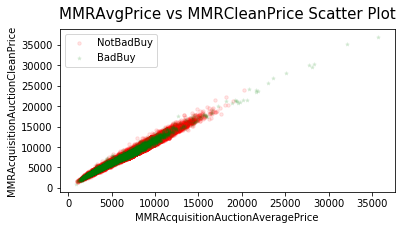

In [10]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionCleanPrice'], color='r', label='NotBadBuy', s=12, alpha = 0.1)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionCleanPrice'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.1)
plt.title('MMRAvgPrice vs MMRCleanPrice Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('MMRAcquisitionAuctionCleanPrice', fontsize=10)
plt.legend()
plt.show()

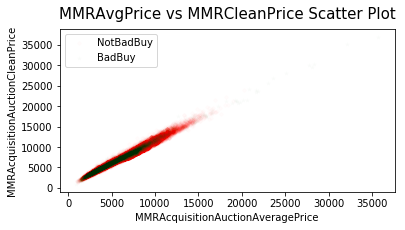

In [11]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionCleanPrice'], color='r', label='NotBadBuy', s=12, alpha = 0.01)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionCleanPrice'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.01)
plt.title('MMRAvgPrice vs MMRCleanPrice Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('MMRAcquisitionAuctionCleanPrice', fontsize=10)
plt.show()

<Figure size 432x216 with 0 Axes>

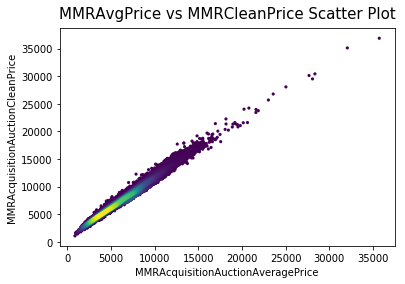

In [12]:
x = df['MMRAcquisitionAuctionAveragePrice'].values
y = df['MMRAcquisitionAuctionCleanPrice'].values

xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(6, 3))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.title('MMRAvgPrice vs MMRCleanPrice Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('MMRAcquisitionAuctionCleanPrice', fontsize=10)
plt.show()

*** - MMRAcquisitionAuctionAveragePrice vs VehBCost ***

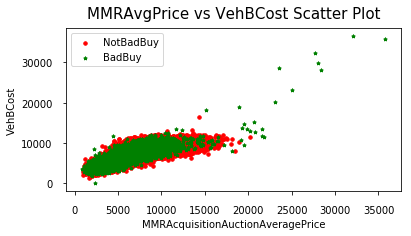

In [13]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'],
            df[df['IsBadBuy'] == 0]['VehBCost'], color='r', label='NotBadBuy', s=12)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='g', marker='*' ,label='BadBuy', s=12)
plt.title('MMRAvgPrice vs VehBCost Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.legend()
plt.tick_params(axis='both', pad=10, labelsize=10)
plt.show()

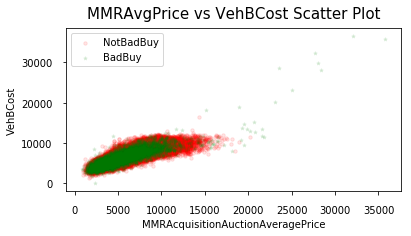

In [14]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'],
            df[df['IsBadBuy'] == 0]['VehBCost'], color='r', label='NotBadBuy', s=12, alpha = 0.1)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.1)
plt.title('MMRAvgPrice vs VehBCost Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.legend()
plt.tick_params(axis='both', pad=10, labelsize=10)
plt.show()

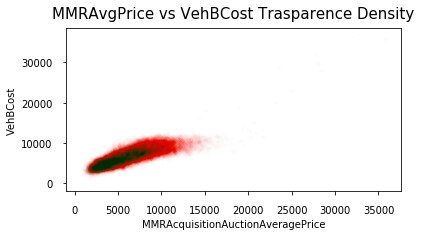

In [27]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'],
            df[df['IsBadBuy'] == 0]['VehBCost'], color='r', label='NotBadBuy', s=12, alpha = 0.01)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.01)
plt.title('MMRAvgPrice vs VehBCost Trasparence Density', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.tick_params(axis='both', pad=10, labelsize=10)
plt.show()

<Figure size 432x216 with 0 Axes>

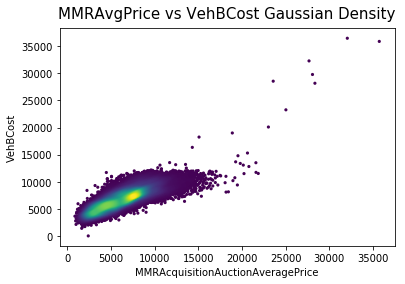

In [28]:
x = df['MMRAcquisitionAuctionAveragePrice'].values
y = df['VehBCost'].values

xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(6, 3))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.title('MMRAvgPrice vs VehBCost Gaussian Density', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.show()

*** - MMRAcquisitionAuctionAveragePrice vs VehOdo ***

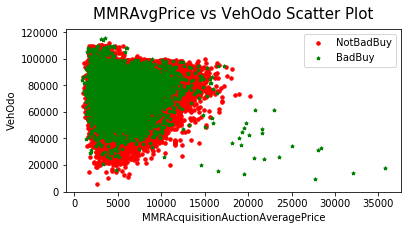

In [17]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 0]['VehOdo'], color='r', label='NotBadBuy', s=12)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['VehOdo'], color='g', marker='*' ,label='BadBuy', s=12)
plt.title('MMRAvgPrice vs VehOdo Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehOdo', fontsize=10)
plt.legend()
plt.show()

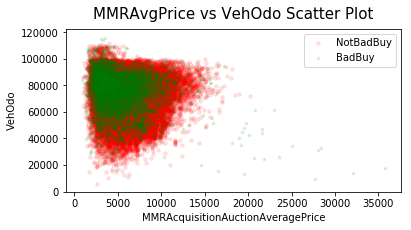

In [18]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 0]['VehOdo'], color='r', label='NotBadBuy', s=12, alpha = 0.1)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['VehOdo'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.1)
plt.title('MMRAvgPrice vs VehOdo Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehOdo', fontsize=10)
plt.legend()
plt.show()

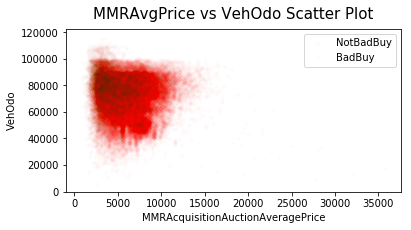

In [19]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 0]['VehOdo'], color='r', label='NotBadBuy', s=12, alpha = 0.01)
plt.scatter(df[df['IsBadBuy'] == 1]['MMRAcquisitionAuctionAveragePrice'], 
            df[df['IsBadBuy'] == 1]['VehOdo'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.01)
plt.title('MMRAvgPrice vs VehOdo Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehOdo', fontsize=10)
plt.show()

<Figure size 432x216 with 0 Axes>

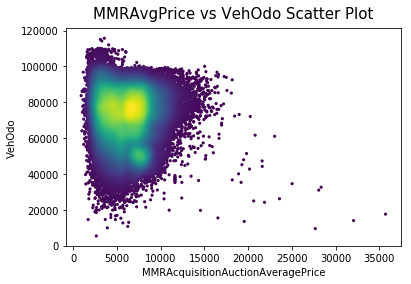

In [20]:
x = df['MMRAcquisitionAuctionAveragePrice'].values
y = df['VehOdo'].values

xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(6, 3))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.title('MMRAvgPrice vs VehOdo Scatter Plot', fontsize=15, pad=10)
plt.xlabel('MMRAcquisitionAuctionAveragePrice', fontsize=10)
plt.ylabel('VehOdo', fontsize=10)
plt.show()

*** - VehOdo vs VehBCost ***

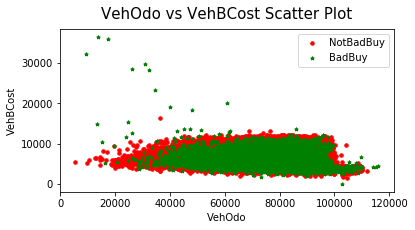

In [21]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['VehOdo'], 
            df[df['IsBadBuy'] == 0]['VehBCost'], color='r', label='NotBadBuy', s=12)
plt.scatter(df[df['IsBadBuy'] == 1]['VehOdo'], 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='g', marker='*' ,label='BadBuy', s=12)
plt.title('VehOdo vs VehBCost Scatter Plot', fontsize=15, pad=10)
plt.xlabel('VehOdo', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.legend()
plt.show()

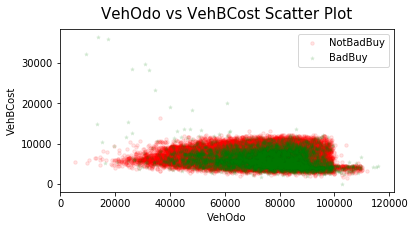

In [22]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['VehOdo'], 
            df[df['IsBadBuy'] == 0]['VehBCost'], color='r', label='NotBadBuy', s=12, alpha = 0.1)
plt.scatter(df[df['IsBadBuy'] == 1]['VehOdo'], 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.1)
plt.title('VehOdo vs VehBCost Scatter Plot', fontsize=15, pad=10)
plt.xlabel('VehOdo', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.legend()
plt.show()

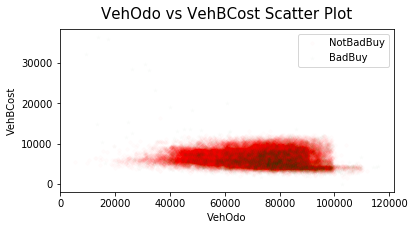

In [23]:
plt.figure(figsize=(6, 3))
plt.scatter(df[df['IsBadBuy'] == 0]['VehOdo'], 
            df[df['IsBadBuy'] == 0]['VehBCost'], color='r', label='NotBadBuy', s=12, alpha = 0.01)
plt.scatter(df[df['IsBadBuy'] == 1]['VehOdo'], 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='g', marker='*' ,label='BadBuy', s=12, alpha = 0.01)
plt.title('VehOdo vs VehBCost Scatter Plot', fontsize=15, pad=10)
plt.xlabel('VehOdo', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.show()

<Figure size 432x216 with 0 Axes>

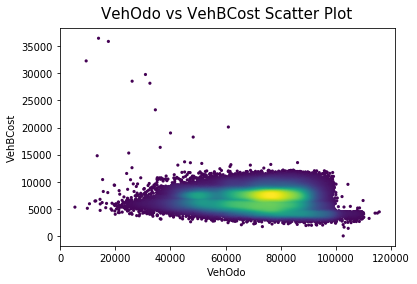

In [24]:
x = df['VehOdo'].values
y = df['VehBCost'].values

xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(6, 3))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.title('VehOdo vs VehBCost Scatter Plot', fontsize=15, pad=10)
plt.xlabel('VehOdo', fontsize=10)
plt.ylabel('VehBCost', fontsize=10)
plt.show()

** Eliminazione degli Attributi molto correlati **

In [25]:
del df['MMRAcquisitionAuctionCleanPrice']
del df['MMRAcquisitonRetailCleanPrice']
del df['MMRCurrentAuctionCleanPrice']
del df['MMRCurrentRetailCleanPrice']
del df['MMRAcquisitionRetailAveragePrice']
del df['MMRCurrentAuctionAveragePrice']
del df['MMRCurrentRetailAveragePrice']

# File della Data Understanding generale in Output

In [26]:
df.to_csv(path_or_buf='Training_DU.csv' ,index=False)